In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib


In [2]:
data_train = pd.read_csv('Train.csv')
data_test= pd.read_csv('Test.csv')
data_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#data['Item_Type'].value_counts()
data_train = data_train.dropna()
data_test = data_test.dropna()

In [8]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


In [9]:
print(data_test.duplicated().sum())

0


In [10]:
data_train['Item_Fat_Content']=data_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','regular':'Regular'})
data_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3004
Regular    1646
Name: count, dtype: int64

In [11]:
data_test['Item_Fat_Content']=data_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','regular':'Regular'})
data_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    2008
Regular    1091
Name: count, dtype: int64

In [12]:
data_train['O_Years'] = 2024 - data_train['Outlet_Establishment_Year']
data_test['O_Years'] = 2024 - data_test['Outlet_Establishment_Year']

In [13]:
le = LabelEncoder()
data_train['I_Fate_Content'] = le.fit_transform(data_train['Item_Fat_Content'])
data_train['I_Type'] = le.fit_transform(data_train['Item_Type'])
data_train['O_Size'] = le.fit_transform(data_train['Outlet_Size'])
data_train['O_Location_Type'] = le.fit_transform(data_train['Outlet_Location_Type'])
data_train['O_Type'] = le.fit_transform(data_train['Outlet_Type'])

In [14]:
le = LabelEncoder()
data_test['I_Fate_Content'] = le.fit_transform(data_test['Item_Fat_Content'])
data_test['I_Type'] = le.fit_transform(data_test['Item_Type'])
data_test['O_Size'] = le.fit_transform(data_test['Outlet_Size'])
data_test['O_Location_Type'] = le.fit_transform(data_test['Outlet_Location_Type'])
data_test['O_Type'] = le.fit_transform(data_test['Outlet_Type'])

In [15]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,O_Years,I_Fate_Content,I_Type,O_Size,O_Location_Type,O_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,25,0,13,1,0,0
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,27,1,6,2,0,0
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,15,1,0,1,2,1
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1,25,0,1,1,0,0
14,DRL59,16.750,Low Fat,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1,37,0,7,0,2,0


In [16]:
data_train = data_train.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year'])
data_test = data_test.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year'])

In [17]:
data_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,O_Years,I_Fate_Content,I_Type,O_Size,O_Location_Type,O_Type
0,9.300,0.016047,249.8092,3735.1380,25,0,4,1,0,0
1,5.920,0.019278,48.2692,443.4228,15,1,14,1,2,1
2,17.500,0.016760,141.6180,2097.2700,25,0,10,1,0,0
4,8.930,0.000000,53.8614,994.7052,37,0,9,0,2,0
5,10.395,0.000000,51.4008,556.6088,15,1,0,1,2,1


In [18]:
data_test.head()

,Item_Weight,Item_Visibility,Item_MRP,O_Years,I_Fate_Content,I_Type,O_Size,O_Location_Type,O_Type
0,20.750,0.007565,107.8622,25,0,13,1,0,0
5,9.800,0.063817,117.1492,27,1,6,2,0,0
6,19.350,0.082602,50.1034,15,1,0,1,2,1
13,4.785,0.092738,122.3098,25,0,1,1,0,0
14,16.750,0.021206,52.0298,37,0,7,0,2,0


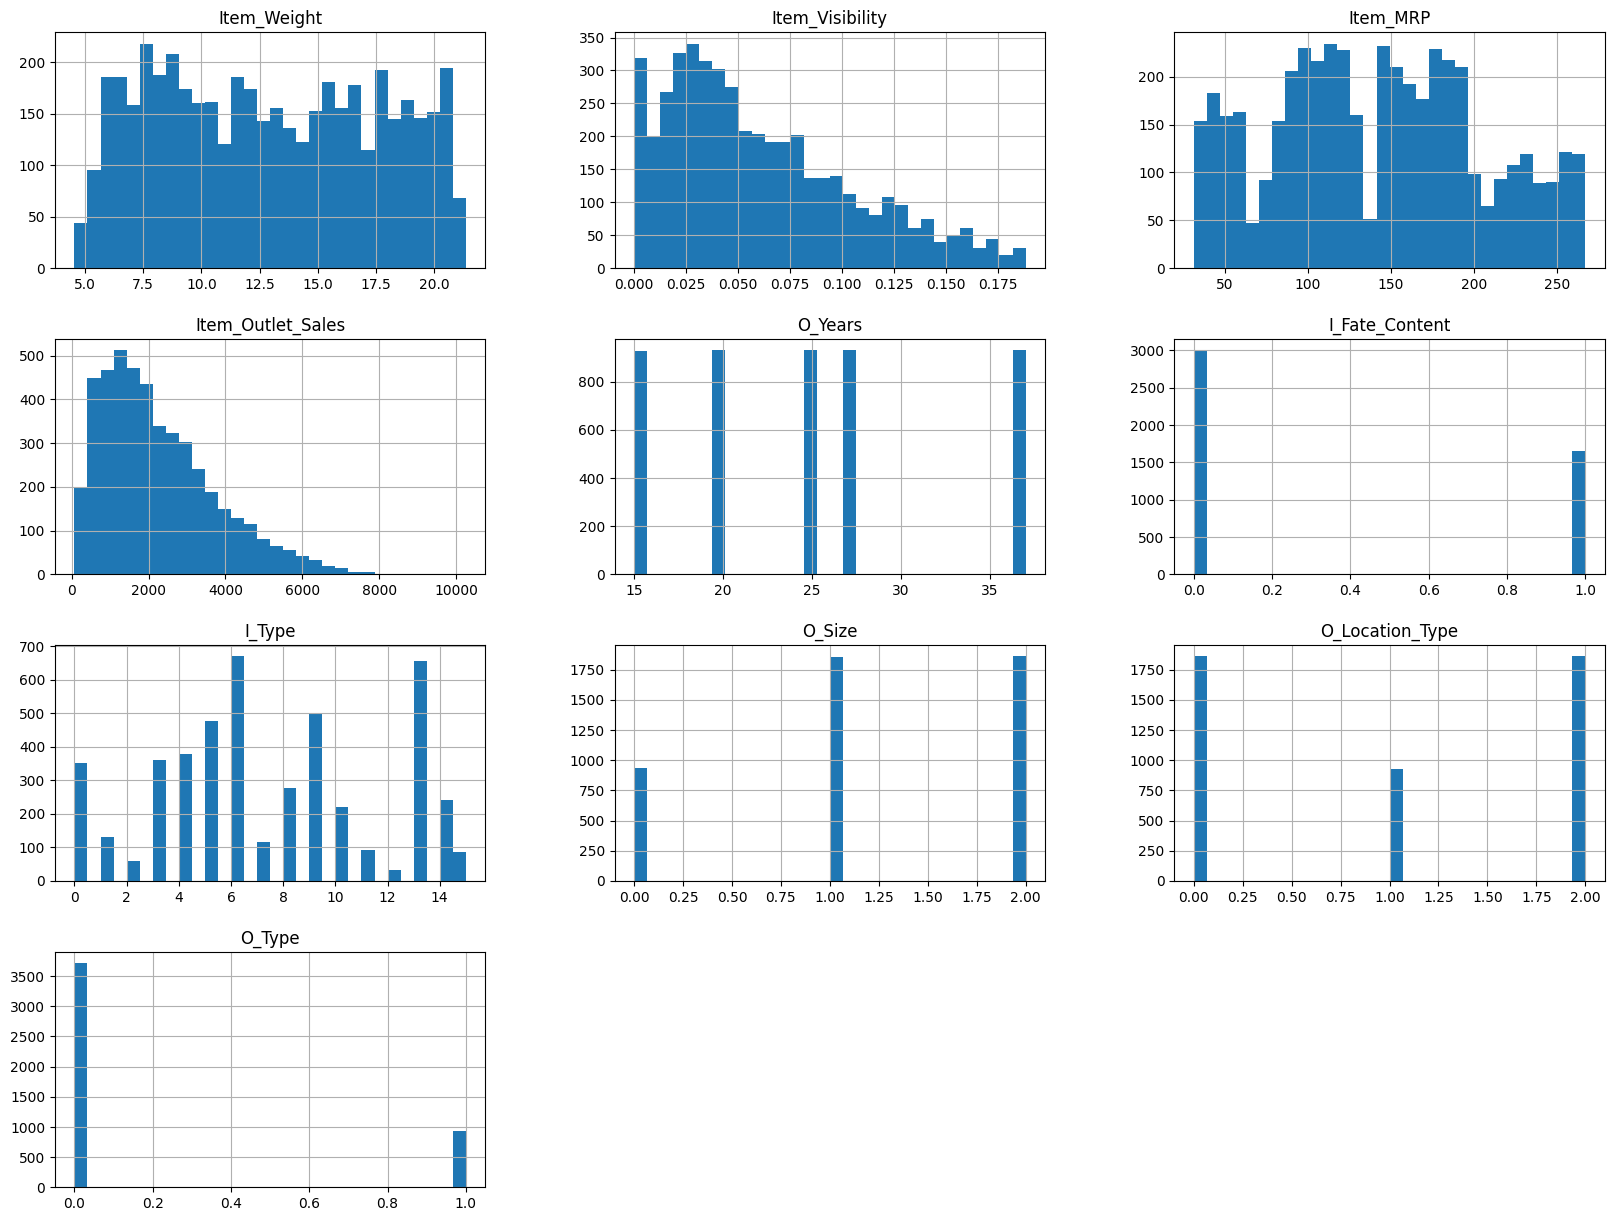

In [19]:
data_train.hist(bins=30, figsize=(20, 15))
plt.show()

In [20]:
data_train['O_Type'].value_counts()

O_Type
0    3722
1     928
Name: count, dtype: int64

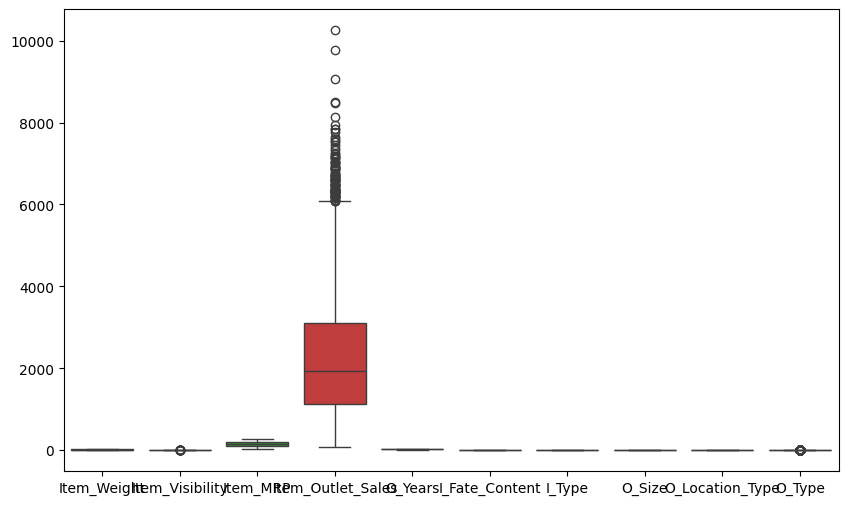

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_train)
plt.show()

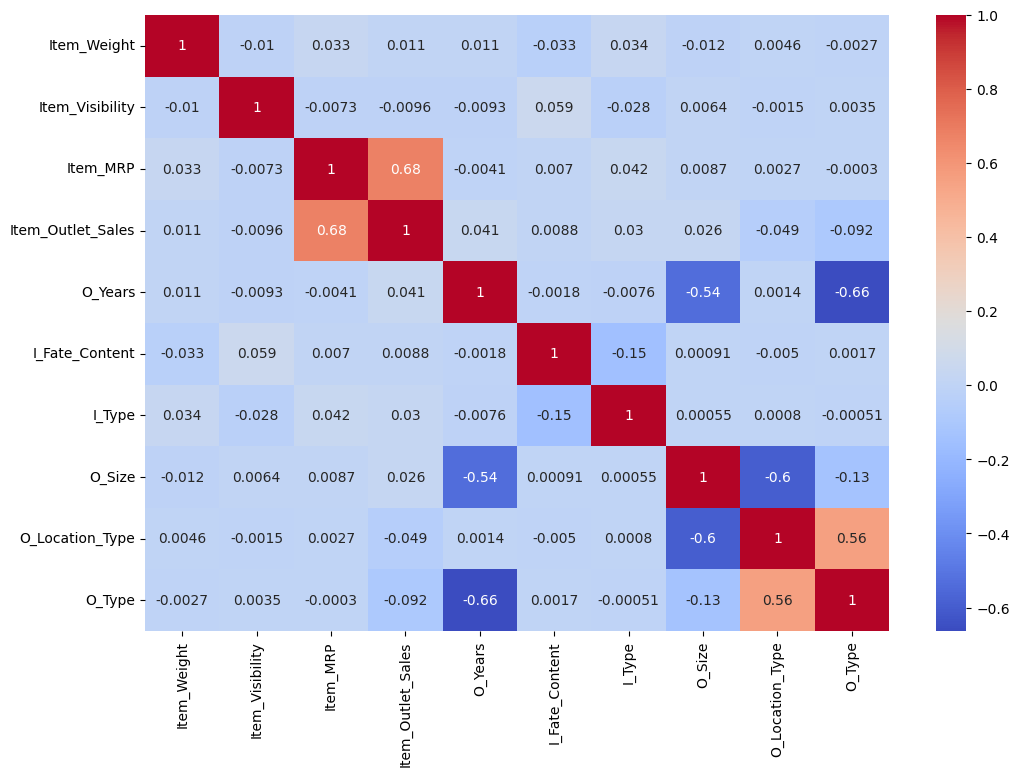

In [22]:
corr_matrix = data_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

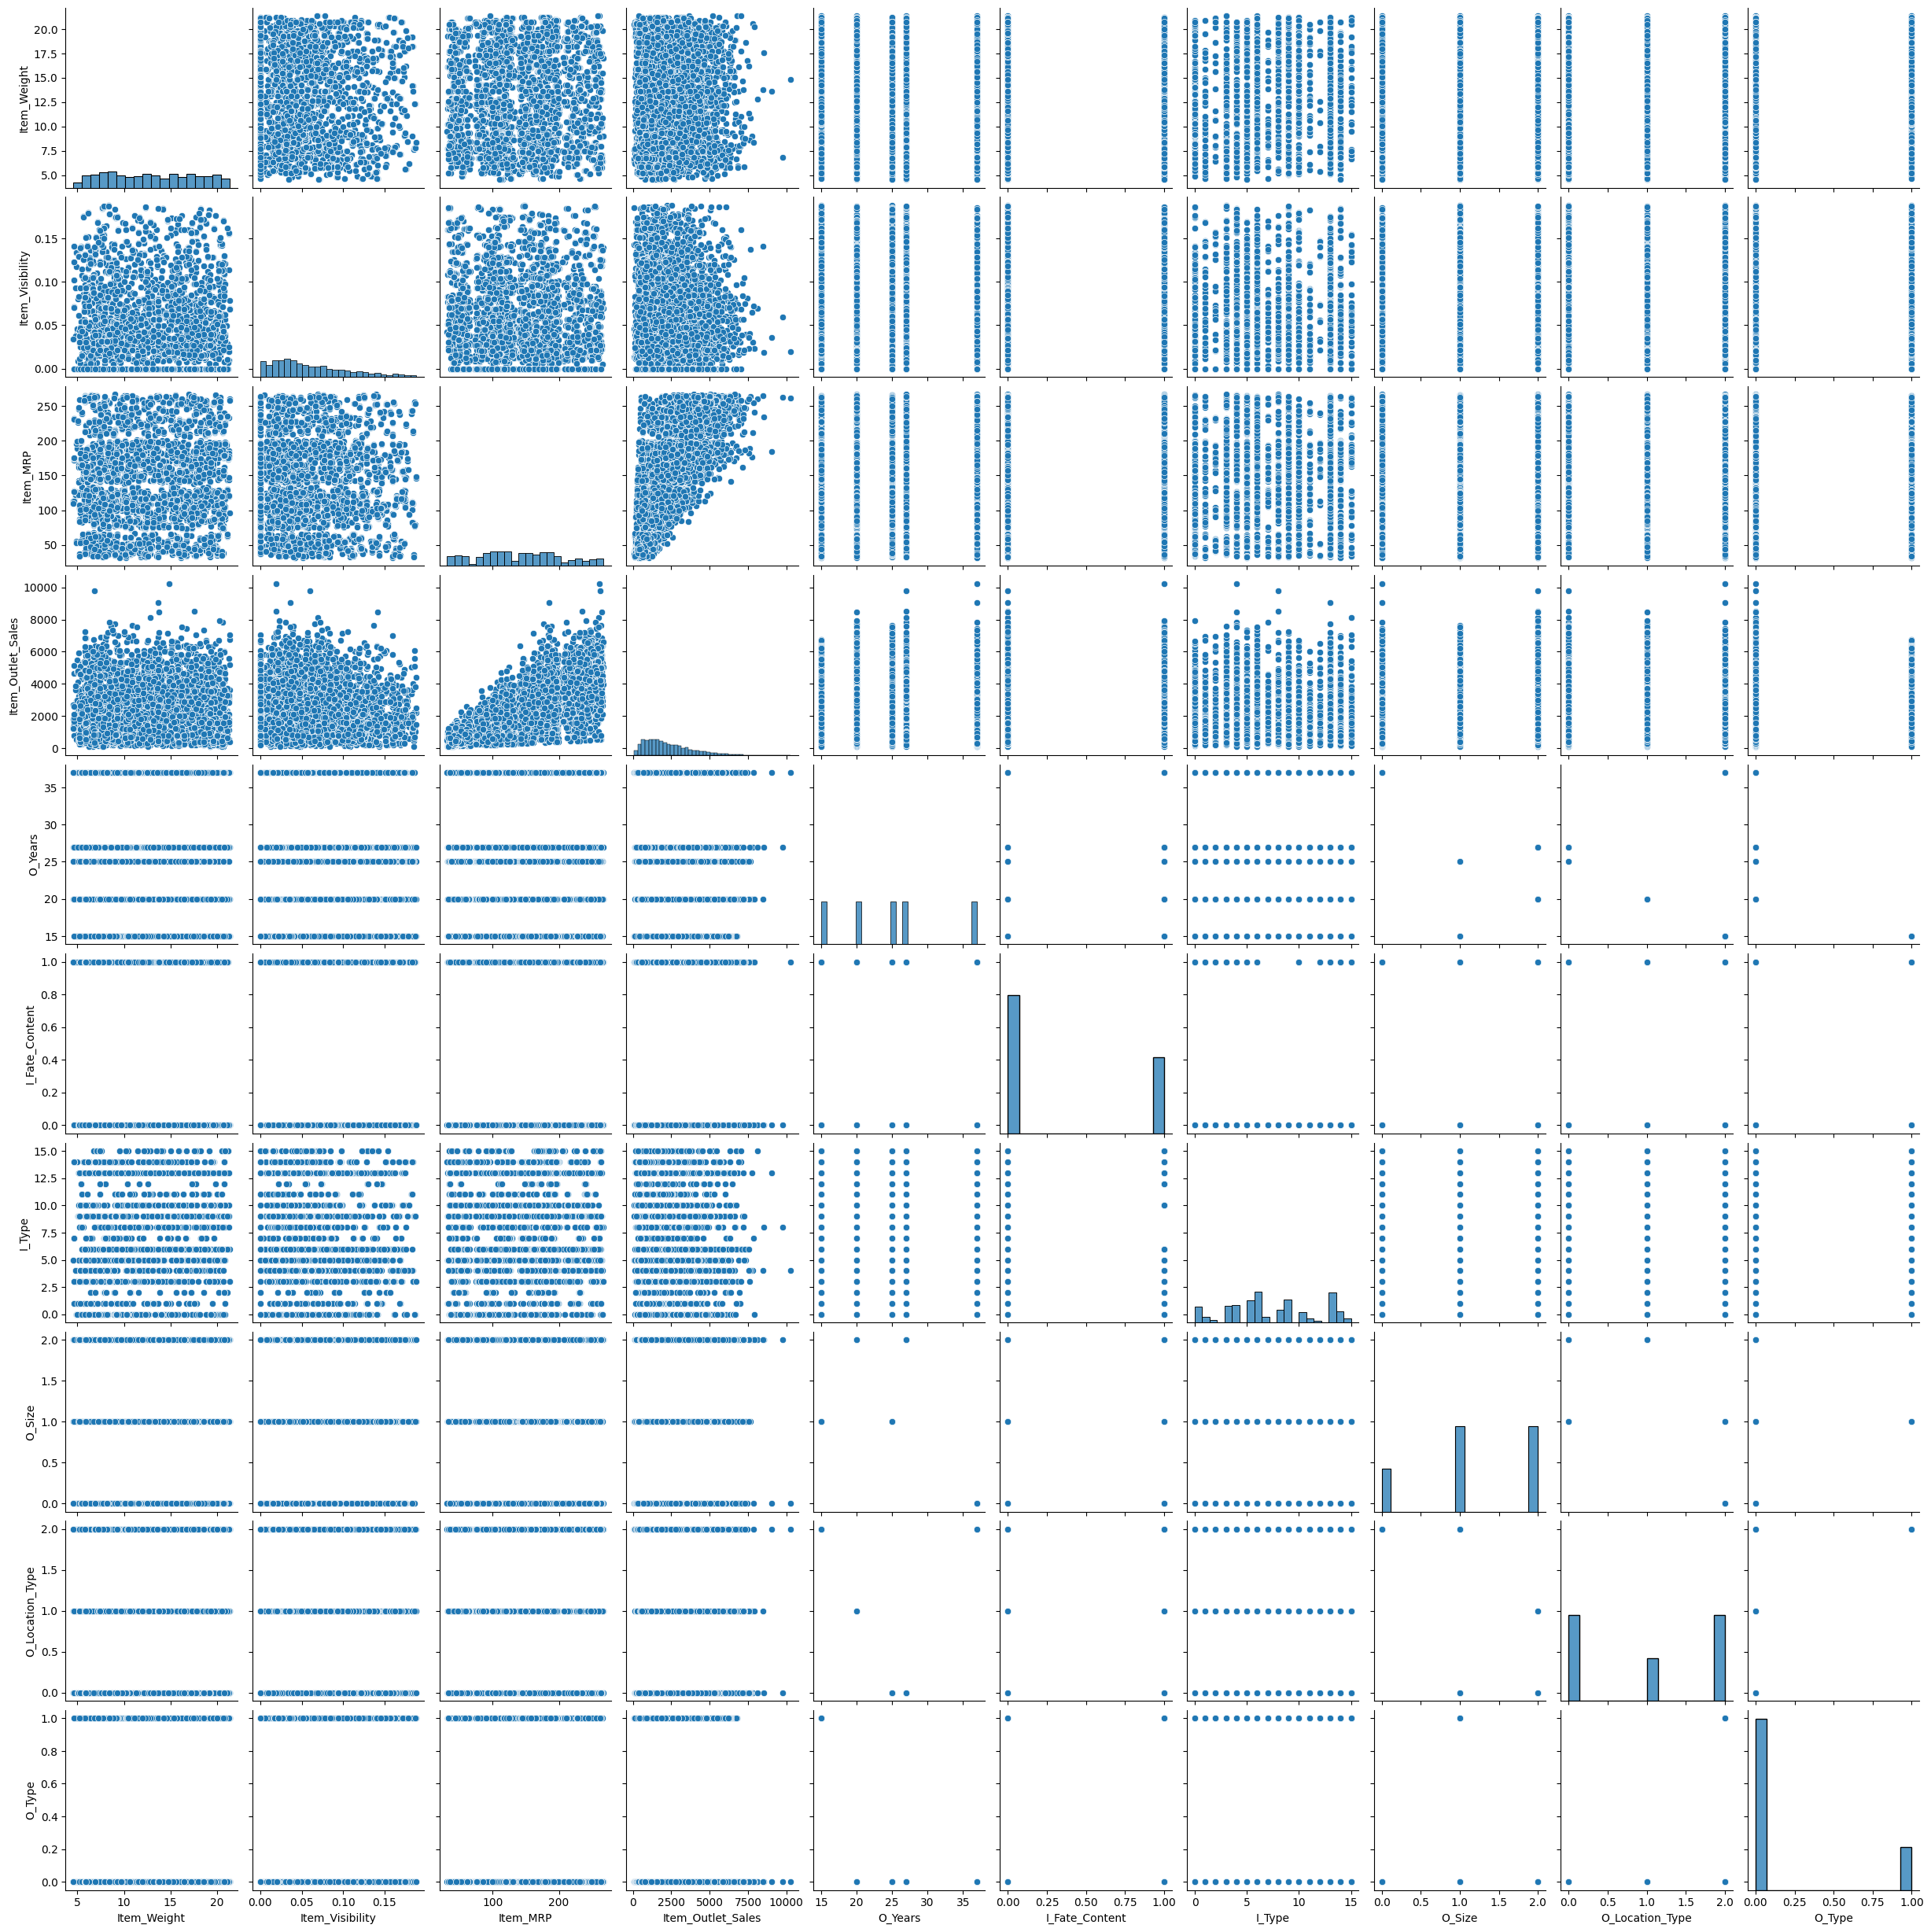

In [23]:
sns.pairplot(data_train)
plt.show()

In [24]:
features = data_train.drop(columns=['Item_Outlet_Sales'])
target = data_train['Item_Outlet_Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [28]:
print('Liniar regression')
print(f'Root Mean Squared Error train: {rmse_train}')
print(f'Mean Absolute Error train: {mae_train}')
print(f'R-squared train: {r2_train}')
print('/n')
print(f'Root Mean Squared Error test: {rmse_test}')
print(f'Mean Absolute Error test: {mae_test}')
print(f'R-squared test: {r2_test}')

Liniar regression
Root Mean Squared Error train: 1100.5471792269705
Mean Absolute Error train: 814.0641919406852
R-squared train: 0.46476082108853334
/n
Root Mean Squared Error test: 1041.4273777344915
Mean Absolute Error test: 765.0272746601863
R-squared test: 0.4981060869009435


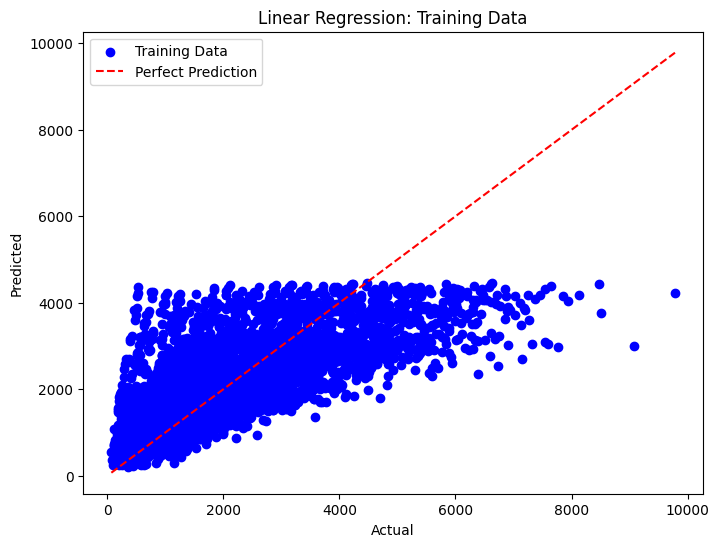

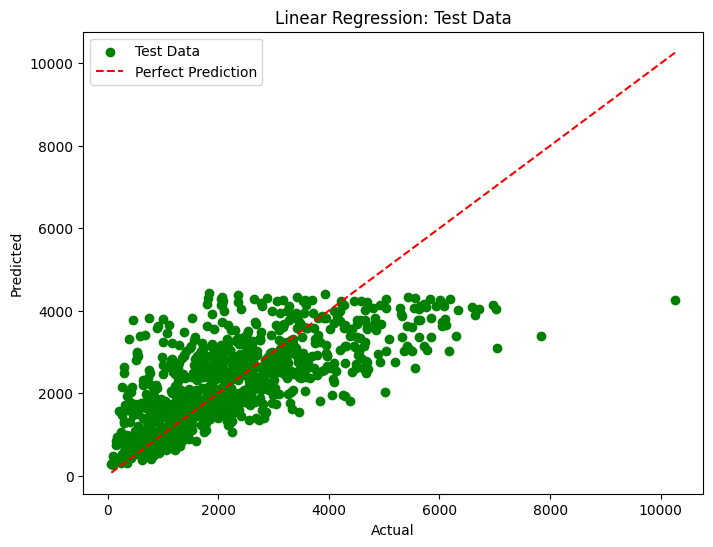

In [29]:
import matplotlib.pyplot as plt

# Plotting predictions for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Training Data')
plt.legend()
plt.show()

# Plotting predictions for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Test Data')
plt.legend()
plt.show()


Now predict actual test dataset

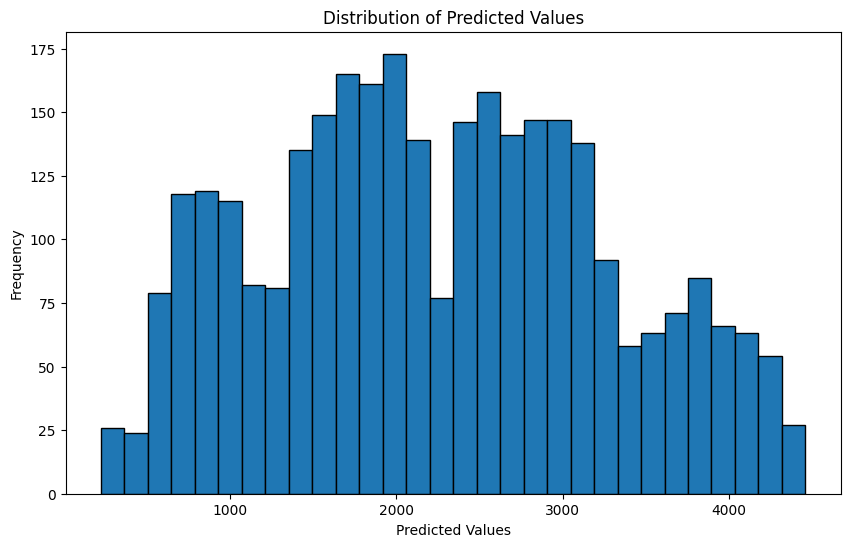

In [30]:
predictions = model.predict(data_test)

baseline_value = np.mean(predictions)  # Example baseline: mean of predicted values

plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=30, edgecolor='k')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


In [31]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,O_Years,I_Fate_Content,I_Type,O_Size,O_Location_Type,O_Type
5953,15.30,0.000000,103.5332,20,0,9,2,1,0
845,7.42,0.020475,248.4092,15,0,13,1,2,1
6759,7.27,0.071064,114.4518,20,0,14,2,1,0
4856,10.30,0.058919,191.6530,25,1,6,1,0,0
8434,12.65,0.062878,160.9578,20,0,14,2,1,0
...,...,...,...,...,...,...,...,...,...
8103,12.60,0.024293,33.4874,15,0,4,1,2,1
874,19.85,0.020961,62.0194,15,1,13,1,2,1
5660,14.35,0.080922,80.0960,15,0,0,1,2,1
6878,14.00,0.030141,216.0192,25,0,6,1,0,0


In [32]:
data_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,O_Years,I_Fate_Content,I_Type,O_Size,O_Location_Type,O_Type
0,9.300,0.016047,249.8092,3735.1380,25,0,4,1,0,0
1,5.920,0.019278,48.2692,443.4228,15,1,14,1,2,1
2,17.500,0.016760,141.6180,2097.2700,25,0,10,1,0,0
4,8.930,0.000000,53.8614,994.7052,37,0,9,0,2,0
5,10.395,0.000000,51.4008,556.6088,15,1,0,1,2,1


In [33]:
cols=['Item_Weight','Item_Visibility','Item_MRP','O_Years','I_Fate_Content','I_Type','O_Size','O_Location_Type','O_Type']
singlr_record = pd.DataFrame([[4,0.20,50,14,0,5,1,0,1]],columns=cols)
predicted_value = model.predict(singlr_record)

predicted_value

array([475.80048491])

Random forest

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [35]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
rf_ytrain_pred = rf_model.predict(X_train)
rf_ytest_pred = rf_model.predict(X_test)

rf_rmse_train = root_mean_squared_error(y_train,rf_ytrain_pred)
rf_mae_train = mean_absolute_error(y_train,rf_ytrain_pred)
rf_r2_train = r2_score(y_train,rf_ytrain_pred)

rf_rmse_test = root_mean_squared_error(y_test,rf_ytest_pred)
rf_mae_test = mean_absolute_error(y_test,rf_ytest_pred)
rf_r2_test = r2_score(y_test,rf_ytest_pred)

In [37]:
print('Random forest')
print(f'Root Mean Squared Error train: {rf_rmse_train}')
print(f'Mean Absolute Error train: {rf_mae_train}')
print(f'R-squared train: {rf_r2_train}')
print('/n')
print(f'Root Mean Squared Error test: {rf_rmse_test}')
print(f'Mean Absolute Error test: {rf_mae_test}')
print(f'R-squared test: {rf_r2_test}')

Random forest
Root Mean Squared Error train: 433.1002061065778
Mean Absolute Error train: 317.4470450983871
R-squared train: 0.9171090061880753
/n
Root Mean Squared Error test: 1102.0703538375858
Mean Absolute Error test: 812.0035302989247
R-squared test: 0.4379530604933145


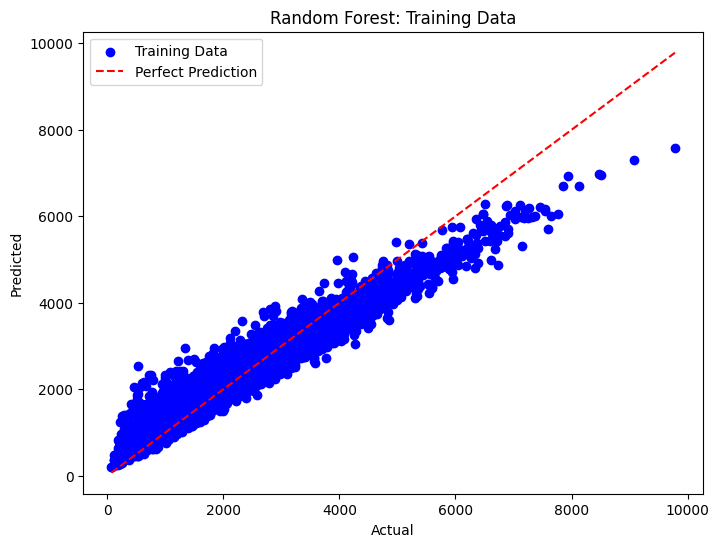

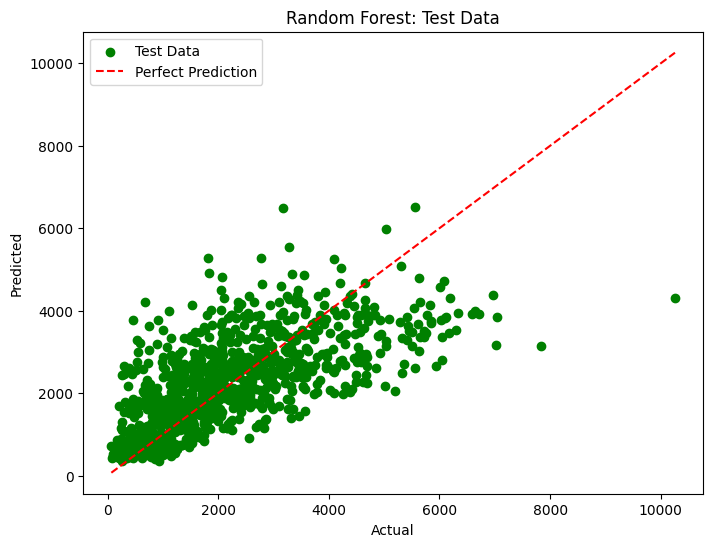

In [38]:

# Plotting predictions for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, rf_ytrain_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Training Data')
plt.legend()
plt.show()

# Plotting predictions for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_ytest_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Test Data')
plt.legend()
plt.show()

In [39]:
predict_single = rf_model.predict(singlr_record)
predict_single

array([1274.247988])

In [40]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [41]:
gb_ytrain_pred = gb_model.predict(X_train)
gb_ytest_pred = gb_model.predict(X_test)

gb_rmse_train = root_mean_squared_error(y_train,gb_ytrain_pred)
gb_mae_train = mean_absolute_error(y_train,gb_ytrain_pred)
gb_r2_train = r2_score(y_train,gb_ytrain_pred)

gb_rmse_test = root_mean_squared_error(y_test,gb_ytest_pred)
gb_mae_test = mean_absolute_error(y_test,gb_ytest_pred)
gb_r2_test = r2_score(y_test,gb_ytest_pred)

In [42]:
print('Gradient Boosting')
print(f'Root Mean Squared Error train: {gb_rmse_train}')
print(f'Mean Absolute Error train: {gb_mae_train}')
print(f'R-squared train: {gb_r2_train}')
print('/n')
print(f'Root Mean Squared Error test: {gb_rmse_test}')
print(f'Mean Absolute Error test: {gb_mae_test}')
print(f'R-squared test: {gb_r2_test}')

Gradient Boosting
Root Mean Squared Error train: 1037.5128524782062
Mean Absolute Error train: 767.637170846926
R-squared train: 0.5243171033318994
/n
Root Mean Squared Error test: 1055.3570611158684
Mean Absolute Error test: 776.0917347651045
R-squared test: 0.48459006217455247


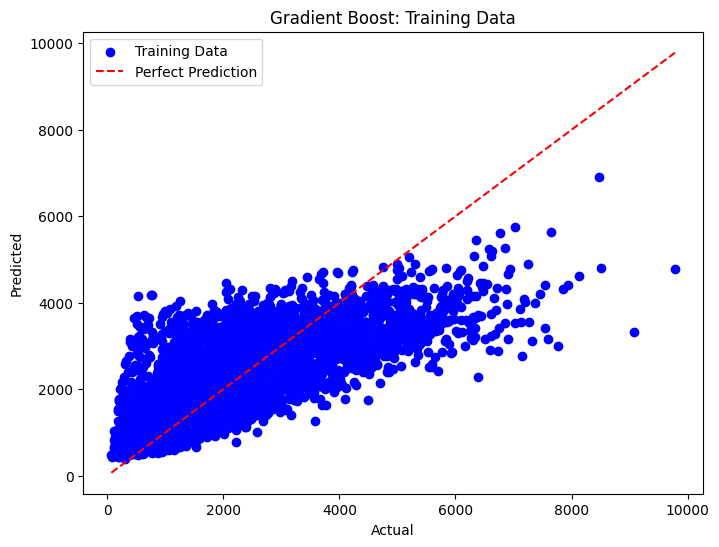

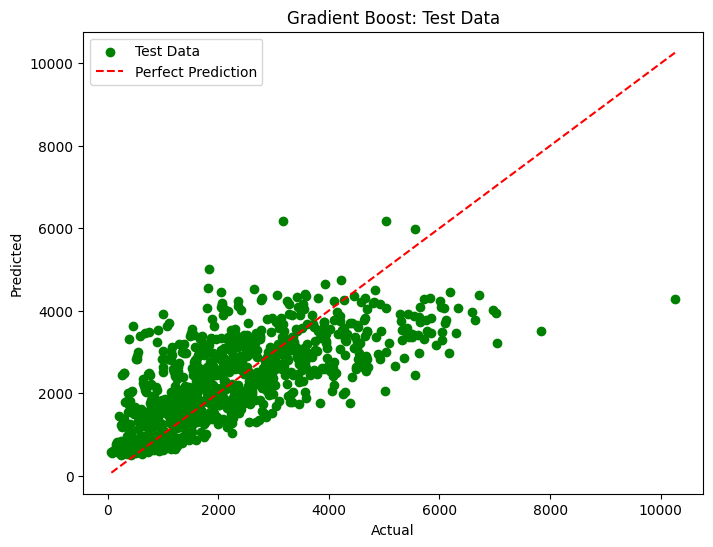

In [43]:

# Plotting predictions for the training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, gb_ytrain_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boost: Training Data')
plt.legend()
plt.show()

# Plotting predictions for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_ytest_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boost: Test Data')
plt.legend()
plt.show()

In [44]:
predict_single = gb_model.predict(singlr_record)
predict_single

array([384.29223682])

In [46]:
joblib.dump(model, 'linear_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']